## 计算给定数据集的香农熵

In [9]:
from math import log
import operator

In [177]:
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    #change to discrete values
    return dataSet, labels

In [178]:
myDat,labels = createDataSet()
print(myDat); print(labels)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']


In [13]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    # 统计每个分类的样本数
    for featVec in dataSet:
        if featVec[-1] not in labelCounts.keys(): 
            labelCounts[featVec[-1]] = 0
        labelCounts[featVec[-1]] = labelCounts[featVec[-1]] + 1
    # 计算样本的香农熵
    shannonEnt = 0
    for key in labelCounts:
        prob = labelCounts[key]/numEntries
        shannonEnt = shannonEnt -prob*log(prob,2) 
    return shannonEnt

In [14]:
calcShannonEnt(myDat)

0.9709505944546686

In [18]:
# 增加第三个分类
myDat[0][-1] = 'maybe'

In [17]:
calcShannonEnt(myDat)

1.3709505944546687

## 划分数据集

In [31]:
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            # 获取axis前面一列
            reducedFeatVec = featVec[:axis]     #chop out axis used for splitting
            # 获取axis后面所有列
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec) # 书上有写append跟extend的区别
    return retDataSet

In [34]:
splitDataSet(myDat,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [33]:
splitDataSet(myDat,0,0)

[[1, 'no'], [1, 'no']]

## 选择最好的数据集划分方式

In [102]:
def chooseBestFeatureToSplit(dataSet):
    # 计算原样本集的熵
    baseEntropy = calcShannonEnt(dataSet)
    numFeatures = len(dataSet[0]) - 1
    bestInfoGain = 0; bestFeature = -1
    # 遍历特征对数据集进行划分
    for i in range(numFeatures):
        featList =  list(v[i] for v in dataSet)  # 特征的所有可能分类
        uniqueVals = set(featList)
        newEntropy = 0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            subEnt = calcShannonEnt(subDataSet)  # 计算子集信息熵
            prob = len(subDataSet)/len(dataSet)
            newEntropy = newEntropy + prob*subEnt
    # 计算划分后数据集的熵及信息增益
        infoGain = baseEntropy - newEntropy
        if bestInfoGain < infoGain:
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [55]:
print(list(v[1] for v in myDat))

[1, 1, 0, 1, 1]


In [56]:
list([[1], [2], [3]])

[[1], [2], [3]]

In [63]:
chooseBestSplitFeatureToSplit(myDat)

0

## 投票表决

In [175]:
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] = classCount[vote] + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

## 创建决策树

In [179]:
def createTree(dataSet, labels):
    classList = [v[-1] for v in dataSet]
    # 停止条件1，样本集合中样本的标签纸相同
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    # 停止条件2，样本的特征被消耗光，只剩标签一列
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    # 创建决策树
    bestFeat = chooseBestSplitFeatureToSplit(dataSet)  # 用来分割数据的最优特征的序号
    bestFeatLabel = labels[bestFeat]  # 用来分割数据的最优特征的标签
    myTree = {bestFeatLabel:{}}
    featValues = list(v[bestFeat] for v in dataSet)# 获取bestFeat的value
    uniqueVals = set(featValues)
    del(labels[bestFeat])
    for value in uniqueVals:
        subLabels = labels
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [180]:
createTree(myDat,labels)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

### 补充知识

#### 字典赋值

In [66]:
myTree = {'a':{}}

In [70]:
myTree['a'][1] = 3

In [71]:
myTree

{'a': {1: 3}}

#### 计算列表中值出现的频次

In [152]:
list_test = ['a', 'a', 'a', 'a', 'b']
list_test.count('a')

4

#### 对字典进行排序

In [166]:
list_test_count = {'a':4, 'b':1}

In [186]:
# dict.items()将字典分解为元组列表
list_test_count.items()

dict_items([('a', 4), ('b', 1)])

In [187]:
# operator.itemgetter()函数获取的不是值，而是定义了一个函数，通过该函数作用到对象上才能获取值。
# key的参数为一个函数或者lambda函数。所以itemgetter可以用来当key的参数
sorted(list_test_count.items(), key=operator.itemgetter(1), reverse=True)  # 根据第二个域进行排序

[('a', 4), ('b', 1)]

## 使用文本注解绘制树节点

In [12]:
import matplotlib.pyplot as plt

In [13]:
# 定义文本框和箭头格式
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")
print('decisionNode: ', decisionNode, 'leafNode:', leafNode, 'arrow_args:', arrow_args)

decisionNode:  {'boxstyle': 'sawtooth', 'fc': '0.8'} leafNode: {'boxstyle': 'round4', 'fc': '0.8'} arrow_args: {'arrowstyle': '<-'}


In [14]:
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )

In [230]:
# # 原始版本createPlot
# def createPlot():
#    fig = plt.figure(1, facecolor='white')
#    fig.clf()
#    createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
#    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#    plt.show()

In [19]:
# 返回树的叶子节点数
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in list(secondDict.keys()):
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs

In [16]:
# 返回树的层数
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in list(secondDict.keys()):
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth

In [17]:
# 计算父节点与子节点的中间位置，并添加文本标签信息
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)

In [24]:
# 绘制树形图
def plotTree(myTree, parentPt, nodeTxt):#if the first key tells you what feat was split on
    numLeafs = getNumLeafs(myTree)  #this determines the x width of this tree
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]     #the text label for this node should be this
    print('numLeafs:', numLeafs)
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    print('判断节点坐标:', cntrPt)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys(): 
        if type(secondDict[key]).__name__=='dict':#test to see if the nodes are dictonaires, if not they are leaf nodes   
            plotTree(secondDict[key],cntrPt,str(key))        #recursion
        else:   #it's a leaf node print the leaf node
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            print('叶子节点坐标 xOff：{}， yOff:{}'.format(plotTree.xOff, plotTree.yOff))
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

In [27]:
# createPlot是主函数，调用了plotTree，创建绘图区，计算树形图的全局尺寸
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
#     axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False)    #no ticks
    #createPlot.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

numLeafs: 4
判断节点坐标: (0.5, 1.0)
叶子节点坐标 xOff：0.125， yOff:0.6666666666666667
numLeafs: 3
判断节点坐标: (0.625, 0.6666666666666667)
numLeafs: 2
判断节点坐标: (0.5, 0.3333333333333334)
叶子节点坐标 xOff：0.375， yOff:1.1102230246251565e-16
叶子节点坐标 xOff：0.625， yOff:1.1102230246251565e-16
叶子节点坐标 xOff：0.875， yOff:0.3333333333333334


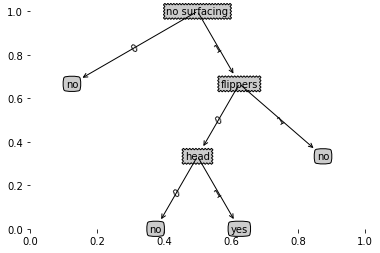

In [28]:
createPlot(myTree)

In [8]:
# 主要用于测试，返回预定义的树结构
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

In [10]:
myTree = retrieveTree(1)
myTree

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [248]:
getNumLeafs(myTree)

firstStr: no surfacing
secondDict: {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}
secondDict.keys(): [0, 1]
firstStr: flippers
secondDict: {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}
secondDict.keys(): [0, 1]
firstStr: head
secondDict: {0: 'no', 1: 'yes'}
secondDict.keys(): [0, 1]


4

In [226]:
getTreeDepth(myTree)

2

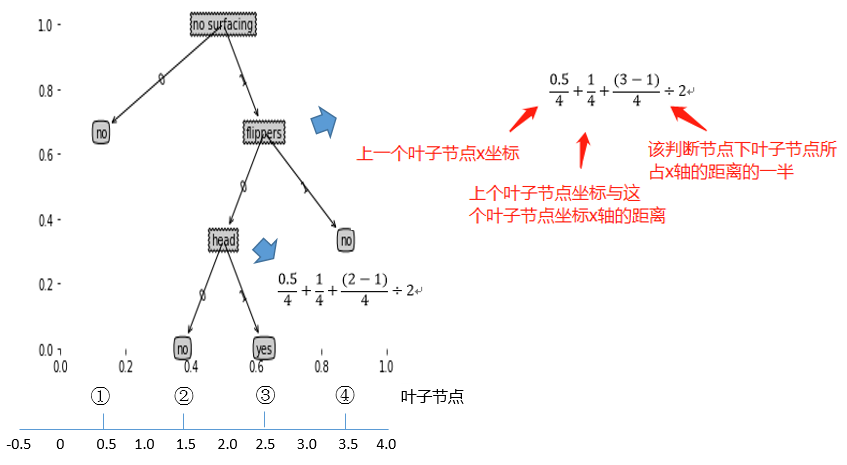
